# Dataset creation

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

# Load the climate data
climate_data = pd.read_csv('/Users/roshanchandru/Desktop/Dataset/climate.csv')

# Load the biomass data from the three different datasets
biomass1_data = pd.read_csv('/Users/roshanchandru/Desktop/Dataset/Biomass1.csv')
biomass2_data = pd.read_csv('/Users/roshanchandru/Desktop/Dataset/Biomass2.csv')
biomass3_data = pd.read_csv('/Users/roshanchandru/Desktop/Dataset/Biomass3.csv')


In [ ]:
climate_data

In [ ]:
biomass1_data

In [ ]:
biomass2_data

In [ ]:
biomass3_data

# Combining the biomass datasets

In [ ]:
# Combine the biomass datasets into a single dataframe
biomass_data = pd.concat([biomass1_data, biomass2_data, biomass3_data], ignore_index=True)


# Convert date to datetime and extract year
climate_data['date'] = pd.to_datetime(climate_data['date'])
climate_data['year'] = climate_data['date'].dt.year

# Filter climate data to only include years that are in the biomass data
filtered_climate_data = climate_data[climate_data['year'].isin(biomass_data['year'].unique())]

# Merge the filtered climate data with the biomass data based on year
merged_data_month = pd.merge(biomass_data, filtered_climate_data, on='year', how='inner')

# Display the merged dataset
print(merged_data_month.head())


In [ ]:
merged_data_month_full.shape

In [ ]:
merged_data_month_full.describe()

In [ ]:
merged_data_month.info()

In [ ]:
missing_values = merged_data_month_full.isnull().sum()
print("Missing Values:\n", missing_values)

In [ ]:
merged_data_month_full.columns

In [ ]:
import pandas as pd

# Define the columns to check for outliers
columns_to_check = ['plot', 'year', 'season', 'subsample', 'Cover_Bareground',
       'species_other', 'biomass', 'month', 'day', 'p_air', 'T_air', 'rh',
       'sh', 'Tpot', 'Tdew', 'VPmax', 'VPact', 'VPdef', 'H2OC', 'rho', 'wv',
       'wd', 'rain1', 'rain2', 'Srain1', 'Srain2', 'Tpyr', 'TDR', 'TUR',
       'SWDR', 'SWUR', 'albedo', 'SDUR', 'SDIR', 'LWDR', 'LWUR', 'TRAD', 'PAR',
       'Rn', 'SHF1', 'SHF2', 'SHF3', 'SHF4', 'SHF5', 'SHFM', 'ST002', 'ST004',
       'ST008', 'ST016', 'ST032', 'ST064', 'ST128', 'SM008', 'SM016', 'SM032',
       'SM064', 'SM128', 'Tlog', 'Heating1', 'Heating2']

outliers_summary = {}

# Iterate through each column to check for outliers
for column in columns_to_check:
    if column in merged_data_month_full.columns:
        # Only process numeric columns
        if pd.api.types.is_numeric_dtype(merged_data_month_full[column]):
            Q1 = merged_data_month_full[column].quantile(0.25)
            Q3 = merged_data_month_full[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = merged_data_month_full[(merged_data_month_full[column] < lower_bound) | 
                                              (merged_data_month_full[column] > upper_bound)]
            outliers_count = outliers[column].count()
            outliers_summary[column] = outliers_count

# Print out the summary of outliers
print(outliers_summary)


# Data analysis

In [1]:
import pandas as pd
data = pd.read_csv('/Users/roshanchandru/Desktop/combined_data.csv')

In [2]:
data1 = data.copy()

# Replace negative biomass values with NaN
data1['biomass'] = data1['biomass'].apply(lambda x: x if x >= 0 else float('NaN'))

# Replace negative Cover_Bareground values with NaN
data1['Cover_Bareground'] = data1['Cover_Bareground'].apply(lambda x: x if x >= 0 else float('NaN'))


In [3]:
data1.columns

Index(['plot', 'year', 'subsample', 'Cover_Bareground', 'species_other',
       'biomass', 'month', 'p_air', 'T_air', 'rh', 'sh', 'Tpot', 'Tdew',
       'VPmax', 'VPact', 'VPdef', 'H2OC', 'rho', 'wv', 'wd', 'rain1', 'rain2',
       'Srain1', 'Srain2', 'Tpyr', 'TDR', 'TUR', 'SWDR', 'SWUR', 'albedo',
       'SDUR', 'SDIR', 'LWDR', 'LWUR', 'TRAD', 'PAR', 'Rn', 'SHF1', 'SHF2',
       'SHF3', 'SHF4', 'SHF5', 'SHFM', 'ST002', 'ST004', 'ST008', 'ST016',
       'ST032', 'ST064', 'ST128', 'SM008', 'SM016', 'SM032', 'SM064', 'SM128',
       'Tlog', 'Heating1', 'Heating2'],
      dtype='object')

In [4]:
data1.describe()

,year,subsample,Cover_Bareground,biomass,month,p_air,T_air,rh,sh,Tpot,...,ST064,ST128,SM008,SM016,SM032,SM064,SM128,Tlog,Heating1,Heating2
count,181440.000000,181440.000000,180369.000000,32828.000000,181440.000000,181440.000000,181440.000000,181440.000000,181440.000000,181440.000000,...,181440.000000,181440.000000,181440.000000,181440.000000,181440.000000,181440.000000,181440.000000,181440.000000,181440.000000,181440.000000
mean,2018.000000,1.500000,22.207824,18.636047,6.500000,1000.192855,16.517748,71.320221,8.179402,289.655617,...,15.228243,13.355399,21.928607,20.548244,24.408247,25.491252,31.684725,24.624712,37.754855,0.533410
std,0.816499,0.500001,25.155482,61.737971,1.500004,0.901656,2.922767,4.199365,1.253593,2.866071,...,3.170404,2.874245,5.306866,4.417426,3.835077,2.372209,1.042908,3.047715,8.438838,0.799028
min,2017.000000,1.000000,0.000000,0.000000,5.000000,998.226906,11.354161,64.163206,6.385358,284.656158,...,11.672929,10.055803,15.484516,14.902294,19.839642,22.590297,29.983568,19.361658,23.008507,0.000000
25%,2017.000000,1.000000,5.000000,0.000000,5.000000,1000.351319,14.670455,68.287797,7.168348,287.769397,...,11.692658,10.476023,15.860948,15.692397,20.704752,22.818116,31.033871,22.722823,32.488739,0.000000
50%,2018.000000,1.500000,10.000000,0.000000,6.500000,1000.477882,17.119573,72.108340,8.117129,290.214013,...,15.320897,13.370839,22.509987,20.501534,23.455997,25.450147,31.797053,25.029492,39.749755,0.014181
75%,2019.000000,2.000000,35.000000,7.220000,8.000000,1000.644732,18.996613,74.912455,9.420152,292.120419,...,17.991277,16.028223,26.220248,25.556035,29.319903,28.280416,32.659232,26.825400,44.697332,1.083110
max,2019.000000,2.000000,100.000000,1327.900000,8.000000,1000.978410,19.846113,76.341187,9.868297,292.959700,...,19.370800,16.830671,28.985955,26.135671,29.673190,28.358390,32.837571,28.779407,46.835042,2.088990


In [5]:
# Select only numeric columns
numeric_data = data1.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

correlation_matrix

,year,subsample,Cover_Bareground,biomass,month,p_air,T_air,rh,sh,Tpot,...,ST064,ST128,SM008,SM016,SM032,SM064,SM128,Tlog,Heating1,Heating2
year,1.000000e+00,7.992662e-13,0.090227,-0.024496,2.870659e-12,-6.893348e-01,-1.893095e-01,3.420559e-01,-5.452341e-02,-1.748737e-01,...,2.669649e-02,5.075168e-02,-5.034052e-01,-6.772563e-01,-8.344218e-01,-1.625557e-01,5.488992e-02,-1.715088e-01,2.910596e-01,2.569686e-01
subsample,7.992662e-13,1.000000e+00,0.014497,-0.000770,7.651066e-15,1.012586e-12,1.822737e-14,1.268795e-14,4.728002e-15,-1.882930e-14,...,3.103785e-15,4.235258e-15,-1.636488e-14,-4.725985e-15,7.222661e-15,-6.926637e-15,7.710383e-15,1.476742e-14,-1.567421e-14,-1.430346e-14
Cover_Bareground,9.022689e-02,1.449655e-02,1.000000,-0.079528,2.023892e-01,7.246926e-02,2.513520e-01,-3.326763e-01,1.214956e-01,2.546426e-01,...,2.683905e-01,2.468788e-01,-3.451170e-01,-3.226596e-01,-2.904931e-01,-2.641317e-01,-3.181020e-01,2.960766e-01,-3.339296e-01,-1.559859e-01
biomass,-2.449580e-02,-7.699240e-04,-0.079528,1.000000,-1.310691e-01,-5.566227e-02,-1.228089e-01,2.741013e-02,-1.230150e-01,-1.237720e-01,...,-1.345060e-01,-1.343546e-01,7.742900e-02,8.731054e-02,7.132915e-02,1.355077e-01,1.249196e-01,-1.217697e-01,1.149450e-02,9.757611e-02
month,2.870659e-12,7.651066e-15,0.202389,-0.131069,1.000000e+00,4.709730e-01,8.759346e-01,-8.254715e-02,9.294033e-01,8.810941e-01,...,9.750323e-01,9.888433e-01,-3.426012e-01,-4.145719e-01,-2.920804e-01,-9.363875e-01,-9.307789e-01,8.482493e-01,3.917498e-02,-6.675758e-01
p_air,-6.893348e-01,1.012586e-12,0.072469,-0.055662,4.709730e-01,1.000000e+00,7.664059e-01,-4.769974e-01,6.389645e-01,7.552849e-01,...,4.947093e-01,4.530467e-01,-1.677479e-01,1.855041e-02,2.838899e-01,-4.787200e-01,-4.334830e-01,7.378267e-01,-3.135610e-01,-8.352733e-01
T_air,-1.893095e-01,1.822737e-14,0.251352,-0.122809,8.759346e-01,7.664059e-01,1.000000e+00,-4.390200e-01,9.091697e-01,9.998531e-01,...,9.237530e-01,8.964102e-01,-5.421585e-01,-4.925774e-01,-2.782591e-01,-9.255442e-01,-8.487815e-01,9.914933e-01,-2.803900e-01,-9.139558e-01
rh,3.420559e-01,1.268795e-14,-0.332676,0.027410,-8.254715e-02,-4.769974e-01,-4.390200e-01,1.000000e+00,-2.546845e-02,-4.355277e-01,...,-2.691978e-01,-1.860618e-01,4.801303e-01,3.132175e-01,1.632232e-01,2.373788e-01,3.490625e-01,-5.355434e-01,9.797809e-01,4.656834e-01
sh,-5.452341e-02,4.728002e-15,0.121496,-0.123015,9.294033e-01,6.389645e-01,9.091697e-01,-2.546845e-02,1.000000e+00,9.104265e-01,...,8.970800e-01,9.044421e-01,-3.834391e-01,-4.033834e-01,-2.321543e-01,-9.170027e-01,-7.716743e-01,8.540106e-01,1.438791e-01,-8.090643e-01
Tpot,-1.748737e-01,-1.882930e-14,0.254643,-0.123772,8.810941e-01,7.552849e-01,9.998531e-01,-4.355277e-01,9.104265e-01,1.000000e+00,...,9.293086e-01,9.025003e-01,-5.487248e-01,-5.030778e-01,-2.914852e-01,-9.315135e-01,-8.545319e-01,9.919831e-01,-2.780755e-01,-9.101935e-01


The provided correlation matrix showcases a variety of relationships between atmospheric conditions, temporal factors, and biological measures such as biomass. Notably, atmospheric variables like air temperature (T_air) and potential temperature (Tpot) demonstrate an expected strong positive correlation, nearly perfect at 0.999, indicating that these variables tend to increase together, reflective of their inherent physical connection. Conversely, the year shows a significant negative correlation with atmospheric pressure (p_air at -0.689), suggesting a possible trend or change in atmospheric conditions over time captured by the dataset. Biomass exhibits interesting relationships with soil moisture variables (SM008, SM016, SM032), where positive correlations suggest that increased soil moisture could potentially lead to higher biomass, a critical insight for ecological studies or agricultural applications. Meanwhile, variables such as subsample show negligible correlations with other measures, hinting at potential data collection or normalization issues, or simply a lack of meaningful interaction with other variables in this context. Overall, the matrix provides a foundational snapshot of the interactions within the dataset, valuable for further detailed analysis, predictive modeling, and understanding the ecological or environmental dynamics at play.

## Highest Positive Correlations:
- T_air and Tpot: Correlation = 0.9998531
- VPmax and TRAD: Correlation = 0.9964795
- ST032 and ST064: Correlation = 0.9979248
- VPact and H2OC: Correlation = 0.999999
- T_air and VPmax: Correlation = 0.9964764

## Highest Negative Correlations:
- SM032 and year: Correlation = -0.8344218
- SWUR and year: Correlation = -0.8377495
- Heating2 and year: Correlation = -0.8352733
- RH and SWUR: Correlation = -0.9162459
- RH and VPmax: Correlation = -0.9133756

# Missing values

In [6]:
missing_values = data1.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 plot                     0
year                     0
subsample                0
Cover_Bareground      1071
species_other            0
biomass             148612
month                    0
p_air                    0
T_air                    0
rh                       0
sh                       0
Tpot                     0
Tdew                     0
VPmax                    0
VPact                    0
VPdef                    0
H2OC                     0
rho                      0
wv                       0
wd                       0
rain1                    0
rain2                    0
Srain1                   0
Srain2                   0
Tpyr                     0
TDR                      0
TUR                      0
SWDR                     0
SWUR                     0
albedo                   0
SDUR                     0
SDIR                     0
LWDR                     0
LWUR                     0
TRAD                     0
PAR                      0
Rn         

# Cleaning the data

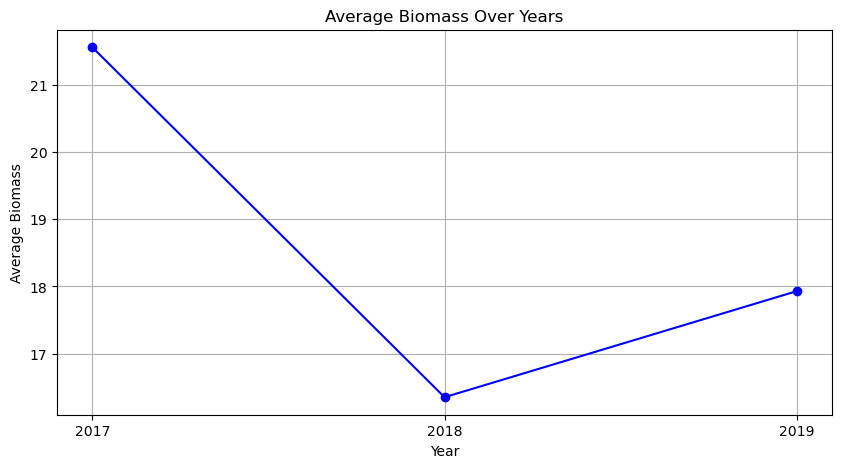

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter out rows with missing biomass values
cleaned_data = data1.dropna(subset=['biomass'])

# Group data by 'year' and calculate the average biomass for each year
yearly_biomass = cleaned_data.groupby('year')['biomass'].mean()

# Plotting the yearly trend of biomass
plt.figure(figsize=(10, 5))
plt.plot(yearly_biomass.index, yearly_biomass, marker='o', linestyle='-', color='b')
plt.title('Average Biomass Over Years')
plt.xlabel('Year')
plt.xticks([2017, 2018, 2019]) 
plt.ylabel('Average Biomass')
plt.grid(True)
plt.show()


The plot depicting the "Average Biomass Over Years" for 2017, 2018, and 2019 reveals distinct year-to-year variations in biomass levels. Here’s an interpretation of the data trends:
- From 2017 to 2018:
There is a noticeable decline in average biomass. This drop from approximately 21 units in 2017 to around 17 units in 2018 suggests a significant decrease in biomass productivity. Factors contributing to this trend could include variations in environmental conditions, such as less favorable weather, changes in land use practices, or other ecological impacts affecting vegetation growth.
- From 2018 to 2019:
The plot shows a recovery in biomass levels, with average biomass increasing from the low in 2018 back up to approximately 18 units in 2019. This rebound indicates an improvement in conditions conducive to biomass production or effective adaptation or management strategies that enhanced vegetation recovery and growth during this period.
Overall Impression: The fluctuations in biomass over these three years underscore the sensitivity of biomass production to external factors, which may include climate variability, agricultural or forestry management practices, and ecological disturbances. The rebound in 2019, while not completely restoring to 2017 levels, is particularly noteworthy as it suggests some resilience or positive response to conditions or interventions made after the decline observed in 2018. Further analysis could explore the specific causes of these fluctuations, potentially examining more granular data on climate conditions, land use changes, or other relevant environmental variables in these years.

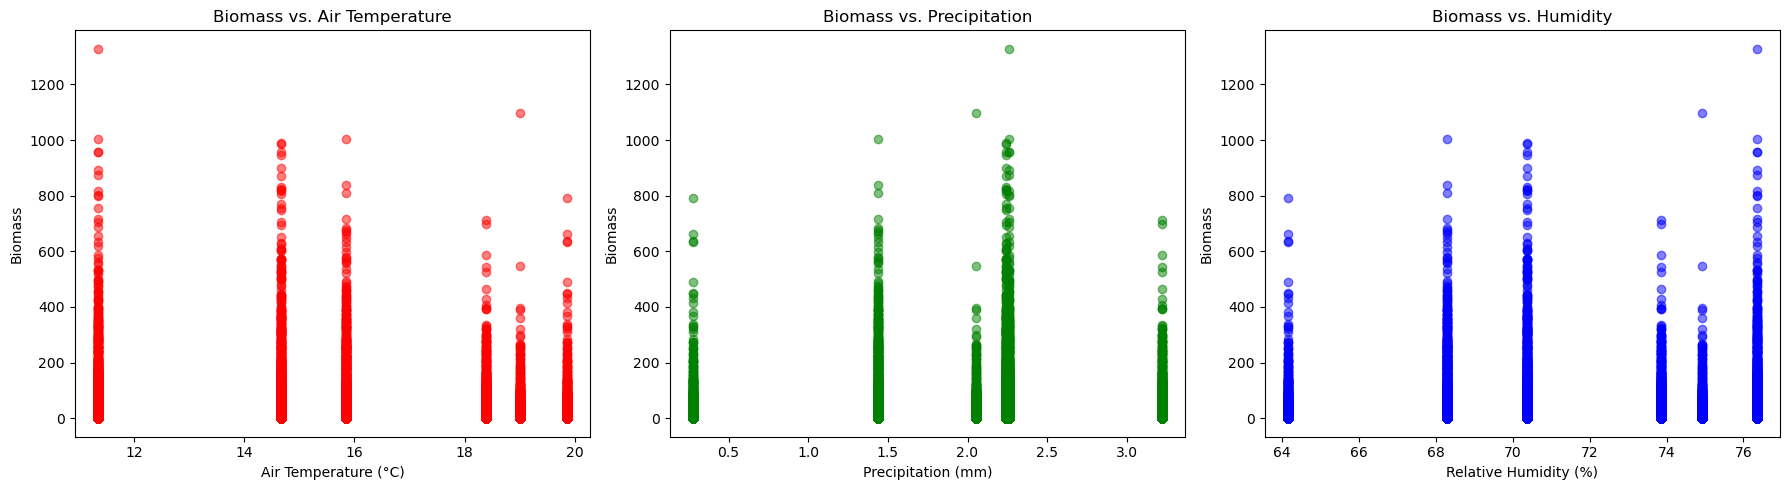

In [8]:
# Scatter plots for biomass vs. key climate indices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Biomass vs. Air Temperature
axes[0].scatter(cleaned_data['T_air'], cleaned_data['biomass'], alpha=0.5, color='red')
axes[0].set_title('Biomass vs. Air Temperature')
axes[0].set_xlabel('Air Temperature (°C)')
axes[0].set_ylabel('Biomass')

# Biomass vs. Precipitation
axes[1].scatter(cleaned_data['rain1'], cleaned_data['biomass'], alpha=0.5, color='green')
axes[1].set_title('Biomass vs. Precipitation')
axes[1].set_xlabel('Precipitation (mm)')
axes[1].set_ylabel('Biomass')

# Biomass vs. Humidity
axes[2].scatter(cleaned_data['rh'], cleaned_data['biomass'], alpha=0.5, color='blue')
axes[2].set_title('Biomass vs. Humidity')
axes[2].set_xlabel('Relative Humidity (%)')
axes[2].set_ylabel('Biomass')

plt.tight_layout()
plt.show()



The provided scatter plots show the relationship between biomass and three key climate variables: air temperature, precipitation, and relative humidity.
- Biomass vs. Air Temperature:
The plot indicates a clustering of data points at specific temperature intervals, particularly around 12°C, 14°C, 16°C, 18°C, and 20°C. The distribution suggests that biomass tends to increase with air temperature up to a certain point, but it also shows substantial variability within the same temperature ranges. This pattern might imply that while temperature influences biomass, other factors may play significant roles, or there might be optimal temperature ranges beyond which the effect on biomass is less pronounced.
- Biomass vs. Precipitation:
Biomass exhibits a trend where it increases with increasing amounts of precipitation up to about 1.5 mm, beyond which the increase in biomass plateaus or slightly declines. This pattern could suggest an optimal level of precipitation for biomass production, where too little limits growth due to insufficient water supply and too much could possibly lead to saturation effects or other detrimental impacts.
- Biomass vs. Relative Humidity:
This plot shows that biomass has a broad distribution across different humidity levels, particularly around 66% to 76% relative humidity. The wide spread of biomass values at similar humidity levels indicates that humidity alone might not be a strong predictor of biomass. The influence of humidity on biomass could be contingent on conjunction with other environmental factors like temperature and soil moisture.
These observations collectively suggest that while climate factors individually impact biomass, the interactions between different environmental variables are complex and likely significant. Optimal conditions for biomass production may exist within specific ranges of these variables, and factors outside these plots (such as soil nutrients, plant species composition, and other ecological interactions) could also be influential. Further analysis could benefit from examining these interactions more deeply, possibly through multivariate analysis or modeling approaches.

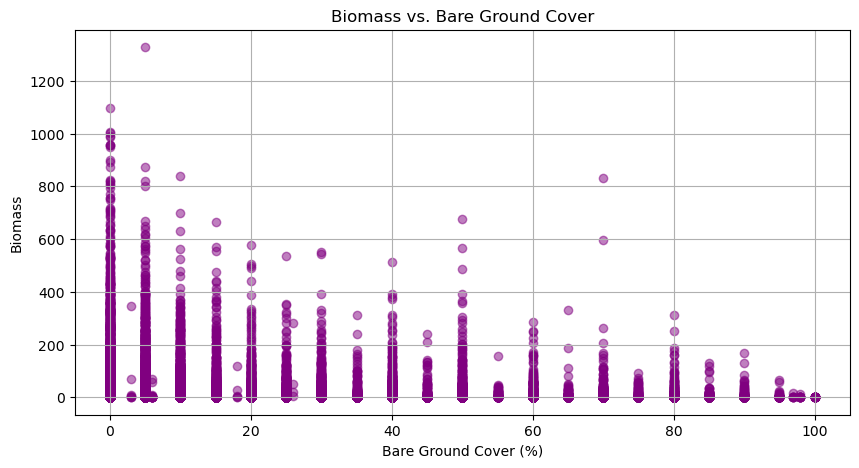

In [14]:
# Scatter plot for biomass vs. bare ground cover
plt.figure(figsize=(10, 5))
plt.scatter(cleaned_data['Cover_Bareground'], cleaned_data['biomass'], alpha=0.5, color='purple')
plt.title('Biomass vs. Bare Ground Cover')
plt.xlabel('Bare Ground Cover (%)')
plt.ylabel('Biomass')
plt.grid(True)
plt.show()


The scatter plot titled "Biomass vs. Bare Ground Cover" visually represents the relationship between biomass production and the percentage of bare ground cover across a range of observed data points.
Key Observations:
- General Trend:
There is a noticeable decrease in biomass as the percentage of bare ground cover increases. Specifically, biomass values are generally higher when bare ground cover is low, indicating that areas with more vegetation (less exposed soil) tend to support greater biomass production.
The highest biomass values are predominantly clustered at lower percentages of bare ground cover, particularly evident in the 0% to 20% range.
- Variability:
At intermediate levels of bare ground cover (around 20% to 40%), biomass shows a substantial spread in values, with some areas still supporting significant biomass production despite increased soil exposure. This suggests that up to a certain threshold, some ecosystems or plant communities may maintain productivity despite reduced vegetation cover.
Beyond 40% bare ground cover, the biomass consistently appears to be lower, and very few data points show high biomass production when bare ground cover exceeds 60%.
- Implications for Land Management:
The plot underscores the importance of vegetation cover in sustaining biomass production, which can be crucial for various ecological and economic purposes, including agriculture, forestry, and carbon sequestration.
This relationship also highlights the potential ecological impacts of land degradation, such as erosion and desertification, which increase bare ground exposure and can significantly reduce biomass productivity.
- Conclusion: The data illustrates a clear ecological interaction where vegetation cover plays a critical role in biomass production. The trend suggests that effective land management strategies aimed at reducing bare ground exposure could be beneficial for enhancing biomass output, particularly in areas prone to degradation or in contexts where maximizing biomass is a priority for environmental or economic reasons.